In [ ]:
import pandas as pd

In [ ]:
wh = pd.read_csv('/content/ whiskey.csv')

In [ ]:
wh.head(10)

,Week,Whisky: (Canada)
0,30/08/20,40
1,06/09/20,42
2,13/09/20,50
3,20/09/20,53
4,27/09/20,41
5,04/10/20,43
6,11/10/20,46
7,18/10/20,47
8,25/10/20,50
9,01/11/20,43


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Convert 'Week' to datetime objects
wh['Week'] = pd.to_datetime(wh['Week'], format='%d/%m/%y')

# Calculate 3-month moving average (approximately 13 weeks)
wh['Moving_Average'] = wh['Whisky: (Canada)'].rolling(window=13).mean()

# Assuming the original 'Whisky: (Canada)' is the actual value and Moving_Average is the prediction
actual_values = wh['Whisky: (Canada)'][12:] # Start from index 12 because of the 13-week window
predicted_values = wh['Moving_Average'][12:]

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(actual_values, predicted_values)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero
mape = np.mean(np.abs((actual_values - predicted_values) / actual_values)) * 100

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Mean Absolute Percentage Error (MAPE): {mape:.2f}%')

display(wh.head(15)) # Display the first 15 rows to show the moving average

Mean Squared Error (MSE): 25.96
Root Mean Squared Error (RMSE): 5.10
Mean Absolute Percentage Error (MAPE): 5.53%


,Week,Whisky: (Canada),Moving_Average
0,2020-08-30,40,NaN
1,2020-09-06,42,NaN
2,2020-09-13,50,44.000000
3,2020-09-20,53,48.333333
4,2020-09-27,41,48.000000
5,2020-10-04,43,45.666667
6,2020-10-11,46,43.333333
7,2020-10-18,47,45.333333
8,2020-10-25,50,47.666667
9,2020-11-01,43,46.666667


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Convert 'Week' to datetime objects
wh['Week'] = pd.to_datetime(wh['Week'], format='%d/%m/%y')

# Calculate 5-week moving average
wh['Moving_Average_5_week'] = wh['Whisky: (Canada)'].rolling(window=5).mean()

# Assuming the original 'Whisky: (Canada)' is the actual value and Moving_Average_5_week is the prediction
actual_values_5_week = wh['Whisky: (Canada)'][4:] # Start from index 4 because of the 5-week window
predicted_values_5_week = wh['Moving_Average_5_week'][4:]

# Calculate Mean Squared Error (MSE)
mse_5_week = mean_squared_error(actual_values_5_week, predicted_values_5_week)

# Calculate Root Mean Squared Error (RMSE)
rmse_5_week = np.sqrt(mse_5_week)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero
mape_5_week = np.mean(np.abs((actual_values_5_week - predicted_values_5_week) / actual_values_5_week)) * 100

print(f'5-Week Moving Average Mean Squared Error (MSE): {mse_5_week:.2f}')
print(f'5-Week Moving Average Root Mean Squared Error (RMSE): {rmse_5_week:.2f}')
print(f'5-Week Moving Average Mean Absolute Percentage Error (MAPE): {mape_5_week:.2f}%')

display(wh.head(10)) # Display the first 10 rows to show the moving average

5-Week Moving Average Mean Squared Error (MSE): 45.65
5-Week Moving Average Root Mean Squared Error (RMSE): 6.76
5-Week Moving Average Mean Absolute Percentage Error (MAPE): 7.38%


,Week,Whisky: (Canada),Moving_Average,Moving_Average_5_week
0,2020-08-30,40,NaN,NaN
1,2020-09-06,42,NaN,NaN
2,2020-09-13,50,44.000000,NaN
3,2020-09-20,53,48.333333,NaN
4,2020-09-27,41,48.000000,45.2
5,2020-10-04,43,45.666667,45.8
6,2020-10-11,46,43.333333,46.6
7,2020-10-18,47,45.333333,46.0
8,2020-10-25,50,47.666667,45.4
9,2020-11-01,43,46.666667,45.8


In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit Simple Exponential Smoothing model
# Using alpha=0.2 as a starting point, this can be tuned later
ses_model = SimpleExpSmoothing(wh['Whisky: (Canada)']).fit(smoothing_level=0.2)

# Get the smoothed values (predictions)
wh['SES'] = ses_model.fittedvalues

# Assuming the original 'Whisky: (Canada)' is the actual value and SES is the prediction
# Simple Exponential Smoothing starts prediction from the second data point (index 1)
actual_values_ses = wh['Whisky: (Canada)'][1:]
predicted_values_ses = wh['SES'][1:]

# Calculate Mean Squared Error (MSE)
mse_ses = mean_squared_error(actual_values_ses, predicted_values_ses)

# Calculate Root Mean Squared Error (RMSE)
rmse_ses = np.sqrt(mse_ses)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero
mape_ses = np.mean(np.abs((actual_values_ses - predicted_values_ses) / actual_values_ses)) * 100

print(f'Simple Exponential Smoothing (alpha=0.2) Mean Squared Error (MSE): {mse_ses:.2f}')
print(f'Simple Exponential Smoothing (alpha=0.2) Root Mean Squared Error (RMSE): {rmse_ses:.2f}')
print(f'Simple Exponential Smoothing (alpha=0.2) Mean Absolute Percentage Error (MAPE): {mape_ses:.2f}%')

display(wh.head()) # Display the first few rows to show the SES values

Simple Exponential Smoothing (alpha=0.2) Mean Squared Error (MSE): 72.50
Simple Exponential Smoothing (alpha=0.2) Root Mean Squared Error (RMSE): 8.51
Simple Exponential Smoothing (alpha=0.2) Mean Absolute Percentage Error (MAPE): 10.04%


/usr/local/lib/python3.12/dist-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


,Week,Whisky: (Canada),Moving_Average,Moving_Average_5_week,SES
0,2020-08-30,40,NaN,NaN,40.000
1,2020-09-06,42,NaN,NaN,40.000
2,2020-09-13,50,44.000000,NaN,40.400
3,2020-09-20,53,48.333333,NaN,42.320
4,2020-09-27,41,48.000000,45.2,44.456


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Double Exponential Smoothing model
# Using default smoothing levels for alpha and beta
des_model = ExponentialSmoothing(wh['Whisky: (Canada)'], trend='add').fit()

# Get the smoothed values (predictions)
wh['DES'] = des_model.fittedvalues

# Assuming the original 'Whisky: (Canada)' is the actual value and DES is the prediction
# Double Exponential Smoothing predictions start from the second data point (index 1) for trend='add'
actual_values_des = wh['Whisky: (Canada)'][1:]
predicted_values_des = wh['DES'][1:]

# Calculate Mean Squared Error (MSE)
mse_des = mean_squared_error(actual_values_des, predicted_values_des)

# Calculate Root Mean Squared Error (RMSE)
rmse_des = np.sqrt(mse_des)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero
mape_des = np.mean(np.abs((actual_values_des - predicted_values_des) / actual_values_des)) * 100

print(f'Double Exponential Smoothing Mean Squared Error (MSE): {mse_des:.2f}')
print(f'Double Exponential Smoothing Root Mean Squared Error (RMSE): {rmse_des:.2f}')
print(f'Double Exponential Smoothing Mean Absolute Percentage Error (MAPE): {mape_des:.2f}%')

display(wh.head()) # Display the first few rows to show the DES values

Double Exponential Smoothing Mean Squared Error (MSE): 45.58
Double Exponential Smoothing Root Mean Squared Error (RMSE): 6.75
Double Exponential Smoothing Mean Absolute Percentage Error (MAPE): 7.51%


,Week,Whisky: (Canada),Moving_Average,Moving_Average_5_week,SES,DES
0,2020-08-30,40,NaN,NaN,40.000,40.000090
1,2020-09-06,42,NaN,NaN,40.000,40.095786
2,2020-09-13,50,44.000000,NaN,40.400,42.095786
3,2020-09-20,53,48.333333,NaN,42.320,50.095786
4,2020-09-27,41,48.000000,45.2,44.456,53.095786


In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Triple Exponential Smoothing model (Holt-Winters)
# Using additive trend and additive seasonality with a seasonal period of 52 (for weekly data)
tes_model = ExponentialSmoothing(wh['Whisky: (Canada)'], trend='add', seasonal='add', seasonal_periods=52).fit()

# Get the smoothed values (predictions)
wh['TES'] = tes_model.fittedvalues

# Assuming the original 'Whisky: (Canada)' is the actual value and TES is the prediction
# Triple Exponential Smoothing predictions start from the second data point (index 1) for trend='add' and seasonal='add'
actual_values_tes = wh['Whisky: (Canada)'][1:]
predicted_values_tes = wh['TES'][1:]

# Calculate Mean Squared Error (MSE)
mse_tes = mean_squared_error(actual_values_tes, predicted_values_tes)

# Calculate Root Mean Squared Error (RMSE)
rmse_tes = np.sqrt(mse_tes)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero
mape_tes = np.mean(np.abs((actual_values_tes - predicted_values_tes) / actual_values_tes)) * 100

print(f'Triple Exponential Smoothing (Holt-Winters) Mean Squared Error (MSE): {mse_tes:.2f}')
print(f'Triple Exponential Smoothing (Holt-Winters) Root Mean Squared Error (RMSE): {rmse_tes:.2f}')
print(f'Triple Exponential Smoothing (Holt-Winters) Mean Absolute Percentage Error (MAPE): {mape_tes:.2f}%')

display(wh.head()) # Display the first few rows to show the TES values

Triple Exponential Smoothing (Holt-Winters) Mean Squared Error (MSE): 13.70
Triple Exponential Smoothing (Holt-Winters) Root Mean Squared Error (RMSE): 3.70
Triple Exponential Smoothing (Holt-Winters) Mean Absolute Percentage Error (MAPE): 4.86%


,Week,Whisky: (Canada),Moving_Average,Moving_Average_5_week,SES,DES,TES
0,2020-08-30,40,NaN,NaN,40.000,40.000090,42.747505
1,2020-09-06,42,NaN,NaN,40.000,40.095786,45.159173
2,2020-09-13,50,44.000000,NaN,40.400,42.095786,42.833883
3,2020-09-20,53,48.333333,NaN,42.320,50.095786,45.369142
4,2020-09-27,41,48.000000,45.2,44.456,53.095786,45.203918


In [ ]:
print("Comparison of Forecasting Model Error Metrics:")
print("-" * 60)
print(f"{'Model':<25} | {'MSE':<10} | {'RMSE':<10} | {'MAPE':<10}")
print("-" * 60)
print(f"{'3-Week Moving Average':<25} | {mse:.2f}{'':<6} | {rmse:.2f}{'':<6} | {mape:.2f}%")
print(f"{'5-Week Moving Average':<25} | {mse_5_week:.2f}{'':<6} | {rmse_5_week:.2f}{'':<6} | {mape_5_week:.2f}%")
print(f"{'Simple Exponential Smoothing':<25} | {mse_ses:.2f}{'':<6} | {rmse_ses:.2f}{'':<6} | {mape_ses:.2f}%")
print(f"{'Double Exponential Smoothing':<25} | {mse_des:.2f}{'':<6} | {rmse_des:.2f}{'':<6} | {mape_des:.2f}%")
print(f"{'Triple Exponential Smoothing':<25} | {mse_tes:.2f}{'':<6} | {rmse_tes:.2f}{'':<6} | {mape_tes:.2f}%")
print("-" * 60)

Comparison of Forecasting Model Error Metrics:
------------------------------------------------------------
Model                     | MSE        | RMSE       | MAPE      
------------------------------------------------------------
3-Week Moving Average     | 25.96       | 5.10       | 5.53%
5-Week Moving Average     | 45.65       | 6.76       | 7.38%
Simple Exponential Smoothing | 72.50       | 8.51       | 10.04%
Double Exponential Smoothing | 45.58       | 6.75       | 7.51%
Triple Exponential Smoothing | 13.70       | 3.70       | 4.86%
------------------------------------------------------------


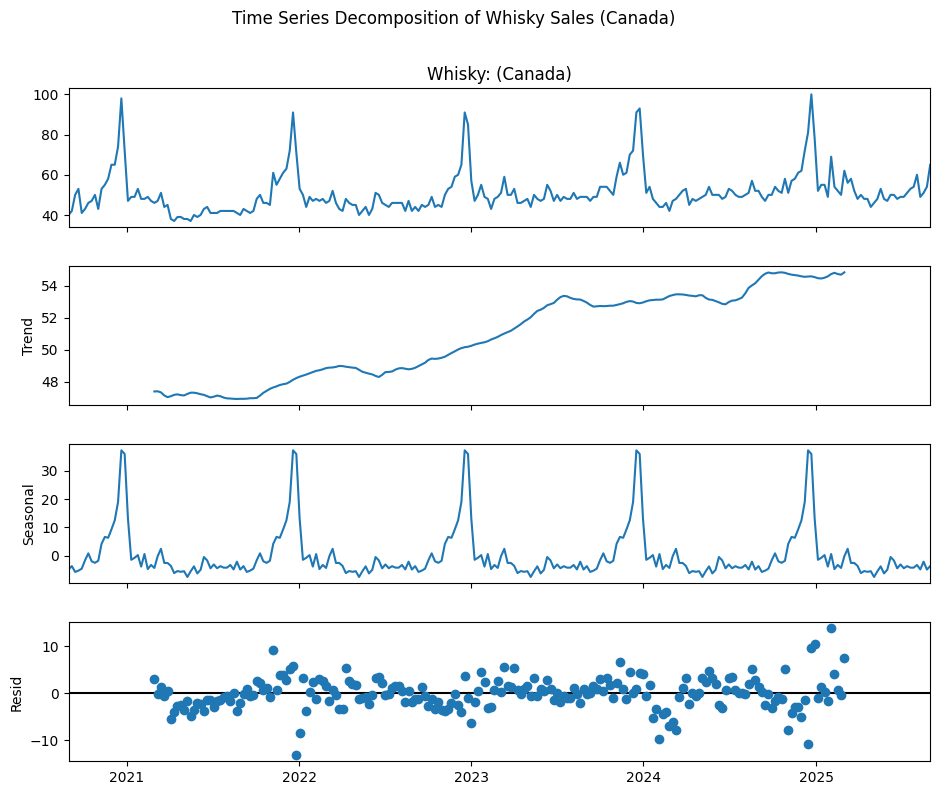

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Set the 'Week' column as the index for time series decomposition
wh_indexed = wh.set_index('Week')

# Perform additive decomposition
decomposition = seasonal_decompose(wh_indexed['Whisky: (Canada)'], model='additive')

# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Time Series Decomposition of Whisky Sales (Canada)', y=1.02)
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Perform Augmented Dickey-Fuller test
result = adfuller(wh['Whisky: (Canada)'])

# Print the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpret the results
if result[1] <= 0.05:
    print("The time series is likely stationary.")
else:
    print("The time series is likely non-stationary.")

ADF Statistic: -5.063298
p-value: 0.000017
Critical Values:
	1%: -3.456
	5%: -2.873
	10%: -2.573
The time series is likely stationary.


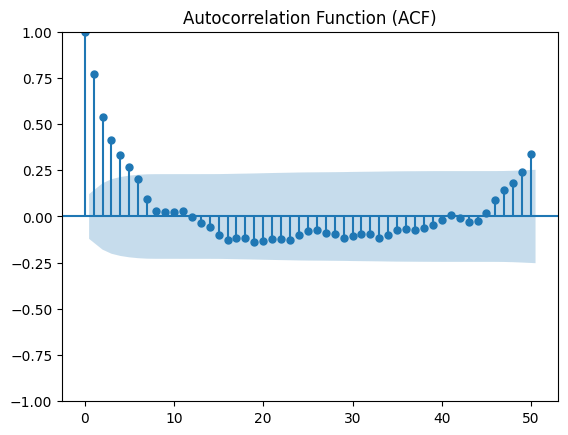

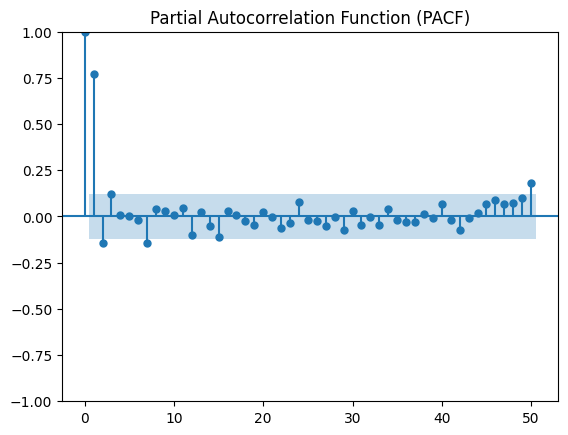

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(wh['Whisky: (Canada)'], lags=50) # You can adjust the number of lags
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(wh['Whisky: (Canada)'], lags=50) # You can adjust the number of lags
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np

# Fit ARMA(1,1) model
# The order (p, d, q) for ARMA is (p, 0, q)
arma_model = ARIMA(wh['Whisky: (Canada)'], order=(1, 0, 1))
arma_results = arma_model.fit()

# Get the predicted values
wh['ARMA'] = arma_results.fittedvalues

# Assuming the original 'Whisky: (Canada)' is the actual value and ARMA is the prediction
# ARMA predictions start from the second data point (index 1)
actual_values_arma = wh['Whisky: (Canada)'][1:]
predicted_values_arma = wh['ARMA'][1:]

# Calculate Mean Squared Error (MSE)
mse_arma = mean_squared_error(actual_values_arma, predicted_values_arma)

# Calculate Root Mean Squared Error (RMSE)
rmse_arma = np.sqrt(mse_arma)

# Calculate Mean Absolute Percentage Error (MAPE)
# Avoid division by zero
mape_arma = np.mean(np.abs((actual_values_arma - predicted_values_arma) / actual_values_arma)) * 100


print(f'ARMA(1,1) Mean Squared Error (MSE): {mse_arma:.2f}')
print(f'ARMA(1,1) Root Mean Squared Error (RMSE): {rmse_arma:.2f}')
print(f'ARMA(1,1) Mean Absolute Percentage Error (MAPE): {mape_arma:.2f}%')

display(wh.head()) # Display the first few rows to show the ARMA values

ARMA(1,1) Mean Squared Error (MSE): 39.24
ARMA(1,1) Root Mean Squared Error (RMSE): 6.26
ARMA(1,1) Mean Absolute Percentage Error (MAPE): 7.54%


,Week,Whisky: (Canada),Moving_Average,Moving_Average_5_week,SES,DES,TES,ARMA
0,2020-08-30,40,NaN,NaN,40.000,40.000090,42.747505,51.102039
1,2020-09-06,42,NaN,NaN,40.000,40.095786,45.159173,42.480625
2,2020-09-13,50,44.000000,NaN,40.400,42.095786,42.833883,44.805537
3,2020-09-20,53,48.333333,NaN,42.320,50.095786,45.369142,51.682493
4,2020-09-27,41,48.000000,45.2,44.456,53.095786,45.203918,52.728053


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA(1,1) model
model_arma_11 = ARIMA(wh['Whisky: (Canada)'], order=(1, 0, 1))
fit_model_arma_11 = model_arma_11.fit()

# Display the model summary
print(fit_model_arma_11.summary())

                               SARIMAX Results                                
Dep. Variable:       Whisky: (Canada)   No. Observations:                  262
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -853.081
Date:                Sat, 06 Sep 2025   AIC                           1714.163
Time:                        16:42:00   BIC                           1728.436
Sample:                             0   HQIC                          1719.900
                                - 262                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.1020      2.206     23.162      0.000      46.778      55.426
ar.L1          0.6788      0.039     17.580      0.000       0.603       0.754
ma.L1          0.2564      0.052      4.978      0.0

In [ ]:
import warnings
from statsmodels.tsa.arima.model import ARIMA

# Define a range of p and q values to test
p_values = range(0, 3)
q_values = range(0, 3)

best_aic = float("inf")
best_order = None
best_model_fit = None

warnings.filterwarnings("ignore") # Ignore warnings during model fitting

# Grid search for the best ARMA model order
for p in p_values:
    for q in q_values:
        if p == 0 and q == 0:
            continue # Skip the case where both p and q are 0
        try:
            model = ARIMA(wh['Whisky: (Canada)'], order=(p, 0, q))
            model_fit = model.fit()
            if model_fit.aic < best_aic:
                best_aic = model_fit.aic
                best_order = (p, 0, q)
                best_model_fit = model_fit
        except:
            continue # Continue to the next combination if fitting fails

print(f"Best ARMA Order (p, d, q): {best_order}")
print(f"Best AIC: {best_aic:.2f}")

# Optionally, display the summary of the best model
if best_model_fit:
    print("\nSummary of the Best ARMA Model:")
    print(best_model_fit.summary())

Best ARMA Order (p, d, q): (1, 0, 1)
Best AIC: 1714.16

Summary of the Best ARMA Model:
                               SARIMAX Results                                
Dep. Variable:       Whisky: (Canada)   No. Observations:                  262
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -853.081
Date:                Sat, 06 Sep 2025   AIC                           1714.163
Time:                        16:42:40   BIC                           1728.436
Sample:                             0   HQIC                          1719.900
                                - 262                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         51.1020      2.206     23.162      0.000      46.778      55.426
ar.L1          0.6788      0.039     17.580

In [ ]:
print(f'ARMA(1,1) Mean Squared Error (MSE): {mse_arma:.2f}')
print(f'ARMA(1,1) Root Mean Squared Error (RMSE): {rmse_arma:.2f}')
print(f'ARMA(1,1) Mean Absolute Percentage Error (MAPE): {mape_arma:.2f}%')

ARMA(1,1) Mean Squared Error (MSE): 39.24
ARMA(1,1) Root Mean Squared Error (RMSE): 6.26
ARMA(1,1) Mean Absolute Percentage Error (MAPE): 7.54%


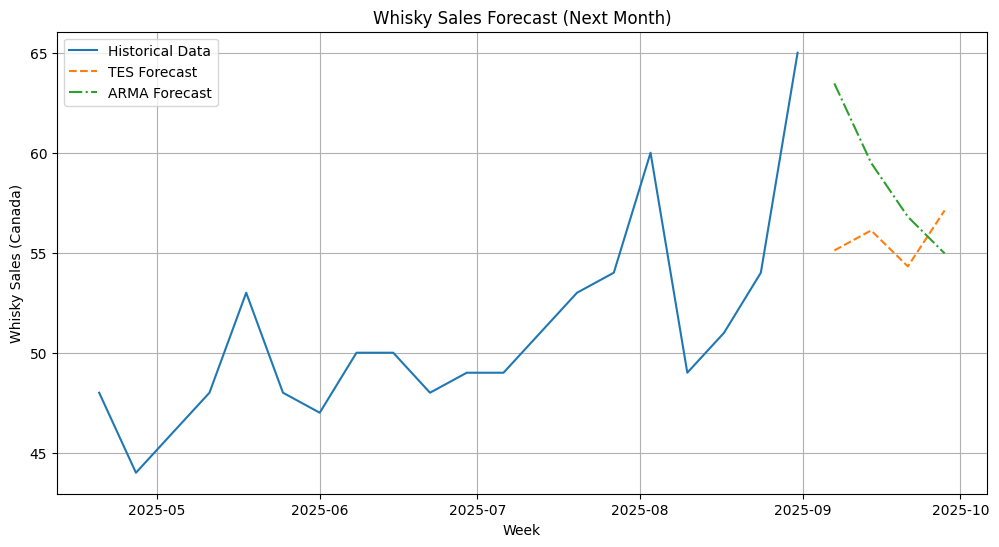

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecast next month using TES model
# Determine the frequency of the data to forecast correctly
# Assuming weekly data, forecasting for 4 weeks (approx one month)
n_forecast_tes = 4
forecast_tes = tes_model.forecast(steps=n_forecast_tes)

# Forecast next month using ARMA model
# Assuming weekly data, forecasting for 4 weeks (approx one month)
n_forecast_arma = 4
forecast_arma = arma_results.forecast(steps=n_forecast_arma)

# Create a date index for the forecast period
last_date = wh['Week'].iloc[-1]
forecast_dates = pd.date_range(start=last_date, periods=n_forecast_tes + 1, freq='W')[1:]

# Add the forecasts to the dataframe for plotting (optional, for easier plotting)
# Ensure we have enough rows in the original dataframe or create a new one for plotting
# For simplicity, we'll create a new dataframe for plotting the last part of historical data and the forecast

# Select the last part of the historical data for plotting
n_historical_plot = 20 # Number of historical points to show in the plot
historical_plot_data = wh.tail(n_historical_plot).copy()

# Create a dataframe for the TES forecast
forecast_tes_df = pd.DataFrame({'Week': forecast_dates, 'TES_Forecast': forecast_tes})

# Create a dataframe for the ARMA forecast
forecast_arma_df = pd.DataFrame({'Week': forecast_dates, 'ARMA_Forecast': forecast_arma})

# Combine historical and forecast data for plotting
# We'll plot the original data, TES forecast, and ARMA forecast separately on the same plot

plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(historical_plot_data['Week'], historical_plot_data['Whisky: (Canada)'], label='Historical Data')

# Plot TES forecast
plt.plot(forecast_tes_df['Week'], forecast_tes_df['TES_Forecast'], label='TES Forecast', linestyle='--')

# Plot ARMA forecast
plt.plot(forecast_arma_df['Week'], forecast_arma_df['ARMA_Forecast'], label='ARMA Forecast', linestyle='-.')


plt.title('Whisky Sales Forecast (Next Month)')
plt.xlabel('Week')
plt.ylabel('Whisky Sales (Canada)')
plt.legend()
plt.grid(True)
plt.show()

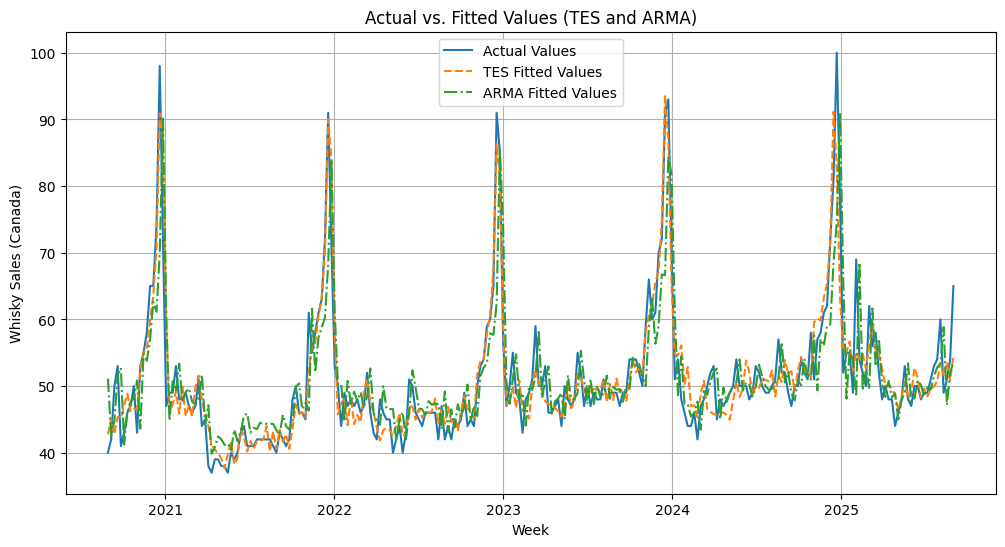

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Plot actual values
plt.plot(wh['Week'], wh['Whisky: (Canada)'], label='Actual Values')

# Plot TES fitted values
plt.plot(wh['Week'], wh['TES'], label='TES Fitted Values', linestyle='--')

# Plot ARMA fitted values
plt.plot(wh['Week'], wh['ARMA'], label='ARMA Fitted Values', linestyle='-.')

plt.title('Actual vs. Fitted Values (TES and ARMA)')
plt.xlabel('Week')
plt.ylabel('Whisky Sales (Canada)')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd

# Ensure forecast dataframes are available (they were created in cell 'lakBLBm763RM' or 'cMMJwfRy6b9S')
# If not available, re-run the forecasting cell or recreate them here
# Assuming they are available:

# Combine the forecast dataframes
# Merge on the 'Week' column
forecast_table = pd.merge(forecast_tes_df, forecast_arma_df, on='Week')

# Display the combined table
print("Predicted Values for Next Month (TES and ARMA):")
display(forecast_table)

Predicted Values for Next Month (TES and ARMA):


,Week,TES_Forecast,ARMA_Forecast
0,2025-09-07,55.114332,63.464327
1,2025-09-14,56.114673,59.493042
2,2025-09-21,54.314987,56.797500
3,2025-09-28,57.115068,54.967879


Predicted Values for Next Year (TES and ARMA):


,Week,TES_Forecast,ARMA_Forecast
0,2025-09-07,55.114332,63.464327
1,2025-09-14,56.114673,59.493042
2,2025-09-21,54.314987,56.797500
3,2025-09-28,57.115068,54.967879
4,2025-10-05,59.714883,53.726009
5,2025-10-12,57.714722,52.883080
6,2025-10-19,57.914933,52.310935
7,2025-10-26,57.115584,51.922587
8,2025-11-02,63.916320,51.658992
9,2025-11-09,66.317066,51.480076


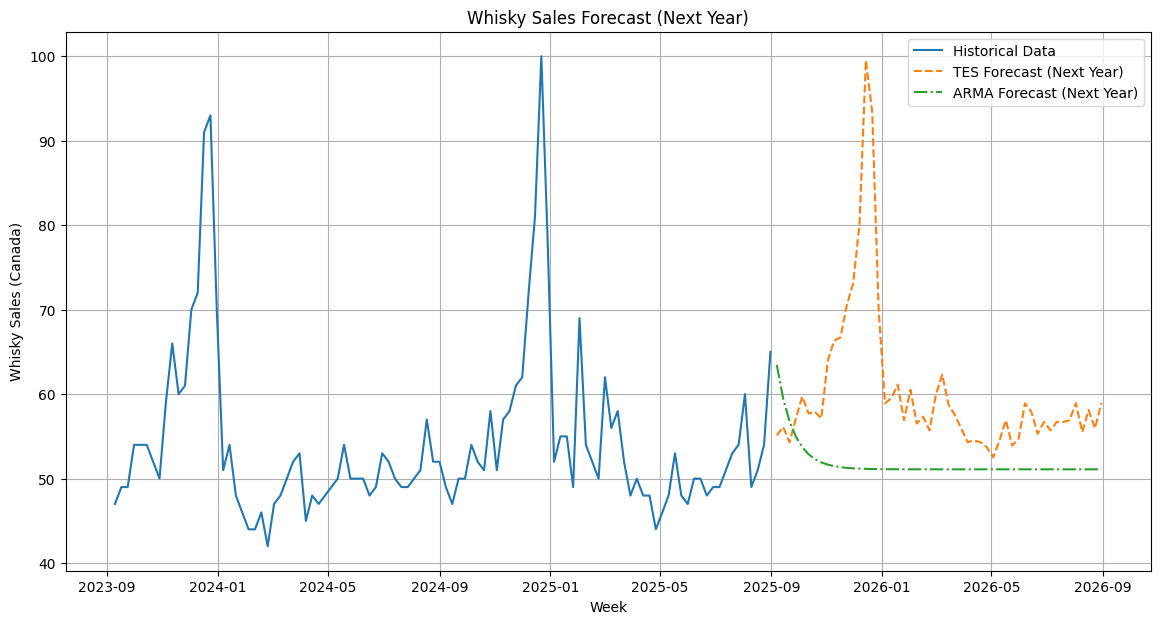

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Forecast next year using TES model (approx 52 weeks)
n_forecast_tes_year = 52
forecast_tes_year = tes_model.forecast(steps=n_forecast_tes_year)

# Forecast next year using ARMA model (approx 52 weeks)
n_forecast_arma_year = 52
forecast_arma_year = arma_results.forecast(steps=n_forecast_arma_year)

# Create a date index for the yearly forecast period
last_date = wh['Week'].iloc[-1]
forecast_dates_year = pd.date_range(start=last_date, periods=n_forecast_tes_year + 1, freq='W')[1:]

# Create a dataframe for the TES yearly forecast
forecast_tes_year_df = pd.DataFrame({'Week': forecast_dates_year, 'TES_Forecast': forecast_tes_year})

# Create a dataframe for the ARMA yearly forecast
forecast_arma_year_df = pd.DataFrame({'Week': forecast_dates_year, 'ARMA_Forecast': forecast_arma_year})

# Combine the yearly forecast dataframes into a table
forecast_year_table = pd.merge(forecast_tes_year_df, forecast_arma_year_df, on='Week')

# Display the combined yearly forecast table
print("Predicted Values for Next Year (TES and ARMA):")
display(forecast_year_table)

# Select a longer period of historical data for plotting the yearly forecast
n_historical_plot_year = 104 # Show approximately 2 years of historical data
historical_plot_data_year = wh.tail(n_historical_plot_year).copy()

# Plot the yearly forecasts
plt.figure(figsize=(14, 7))

# Plot historical data
plt.plot(historical_plot_data_year['Week'], historical_plot_data_year['Whisky: (Canada)'], label='Historical Data')

# Plot TES yearly forecast
plt.plot(forecast_tes_year_df['Week'], forecast_tes_year_df['TES_Forecast'], label='TES Forecast (Next Year)', linestyle='--')

# Plot ARMA yearly forecast
plt.plot(forecast_arma_year_df['Week'], forecast_arma_year_df['ARMA_Forecast'], label='ARMA Forecast (Next Year)', linestyle='-.')

plt.title('Whisky Sales Forecast (Next Year)')
plt.xlabel('Week')
plt.ylabel('Whisky Sales (Canada)')
plt.legend()
plt.grid(True)
plt.show()